In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.io import loadmat
%matplotlib inline

In [2]:
df = loadmat("ex7data1.mat")
X = df['X']

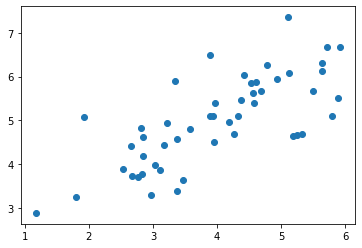

In [3]:
# Visualize the dataset
plt.scatter(X[:,0],X[:,1])

In [4]:
np.std(X,0)

array([1.16126017, 1.01312201])

In [5]:
# Normalize the data
def FeatureNormalize(X):
    mu = np.mean(X,0)
    sigma = np.std(X,0)
    X_norm = (X - mu)/sigma
    return X_norm,mu,sigma

In [6]:
X_norm,mu,sigma = FeatureNormalize(X)

In [7]:
# Principal Component Analysis
def pca(X):
    # Compute Covariance Matrix
    m,n = X.shape
    s = X.T @ X
    u,s,v = np.linalg.svd(s)
    return u,s    

In [11]:
# Compute EigenVectors
U,S = pca(X_norm)
print(U.shape,X_norm.shape)

(2, 2) (50, 2)


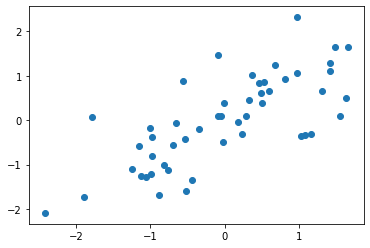

In [9]:
plt.scatter(X_norm[:,0],X_norm[:,1])

In [18]:
def ProjectData(X,U,K):
    Z = np.zeros((X.shape[0],K))
    Ur = U[:,:K]
    Z = X_norm @ Ur
    return Z

In [19]:
# Project the data onto K = 1 Dimension
K = 1
Z = ProjectData(X_norm,U,K)

In [22]:
# Projected Data onto 1st Dimension
Z.shape

(50, 1)

In [23]:
def RecoverData(Z,U,K):
    Ur = U[:,:K]
    Xapprox = Z @ Ur.T
    return Xapprox

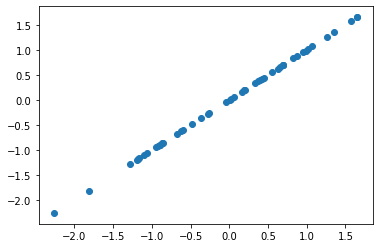

In [33]:
# Recover the Projected Data
X_approx = RecoverData(Z,U,K)
plt.scatter(X_approx[:,0],X_approx[:,1])

In [43]:
df = loadmat("ex7faces.mat")
X = df['X']

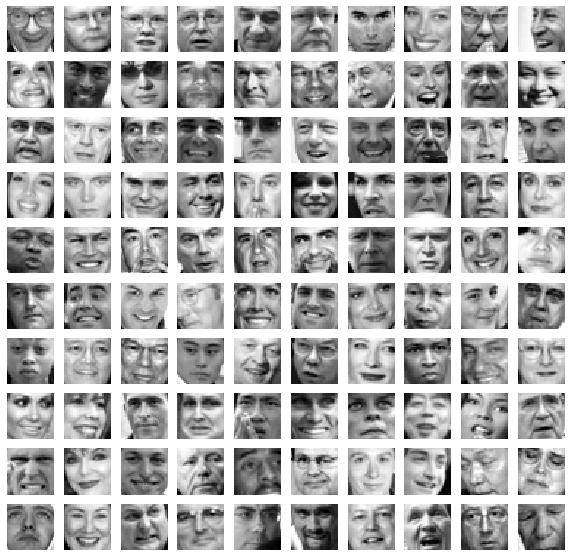

In [49]:
# Display the first 100 faces
fig, axes = plt.subplots(10,10, figsize=(10,10))
index = 0
for i in range(10):
    for j in range(10):
        axes[i,j].imshow(X[index,:].reshape(32,32,order="F"),cmap="gray")
        index+=1
        axes[i,j].axis("off")

In [67]:
X_norm, mu, sigma= FeatureNormalize(X)
U, S = pca(X_norm)
K = 100
# Projected Data
Z = ProjectData(X,U,K)

In [68]:
print(X_r.shape,U.shape)

(5000, 100) (1024, 1024)


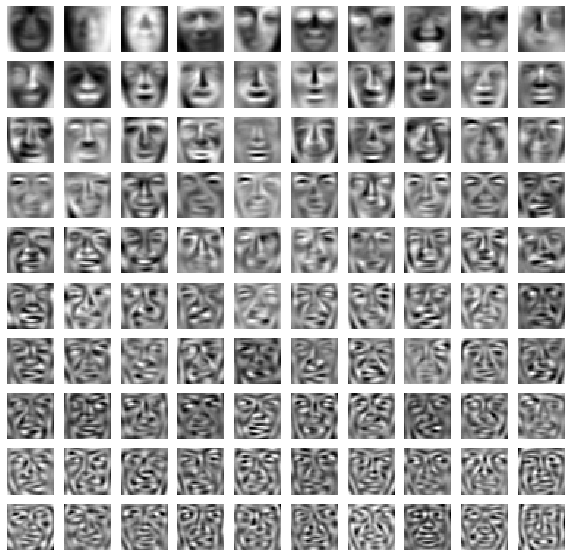

In [69]:
Ut = U.T
# Visualize first 100 eigen vectors
fig, axes = plt.subplots(10,10, figsize=(10,10))
index = 0
for i in range(10):
    for j in range(10):
        axes[i,j].imshow(Ut[index,:].reshape(32,32,order="F"),cmap="gray")
        index+=1
        axes[i,j].axis("off")

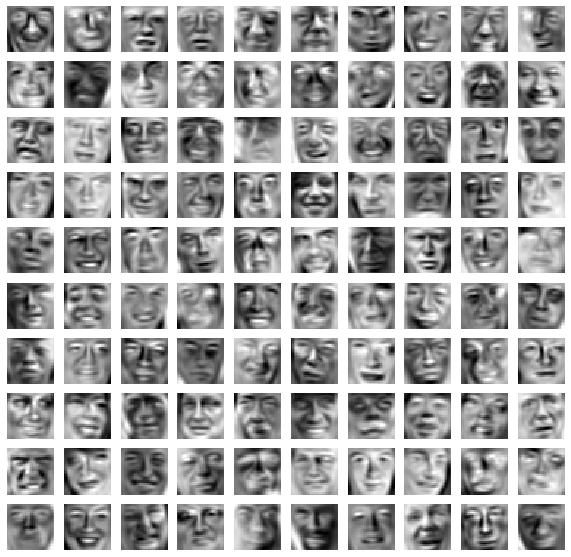

In [71]:
X_re = RecoverData(Z,U,K)
# Visualize Recovered Data
fig, axes = plt.subplots(10,10, figsize=(10,10))
index = 0
for i in range(10):
    for j in range(10):
        axes[i,j].imshow(X_re[index,:].reshape(32,32,order="F"),cmap="gray")
        index+=1
        axes[i,j].axis("off")